In [52]:
#EDA means expoladary data analysis  on a datset using python to understand the data in short using EDA we can explore the data,ask questions,find pattern an spspt problem
#steps1 understand the data what u have
#step 2: data quality 
#step 3: data cleaning
#step 4: we find pattern by using analysis and draw visulazation
#step 5: at end summary
#charn data related to customer who using a company product or service cusyomer charn a customer stops purchasing,switch subcription,becomes in active for long time,compititor switch
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
df=pd.read_csv("C:/Users/yuvar/Downloads/TelecomCustomerChurn.csv")
#print(df)
#df.head()
#df.info()
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()
df.isnull().sum().sum()
df.describe()
df.duplicated().sum()
df["customerID"].duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


np.int64(0)

In [53]:
def change(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(change)



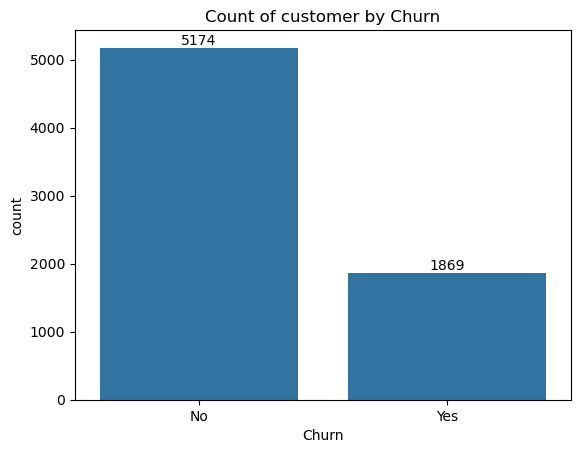

In [55]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

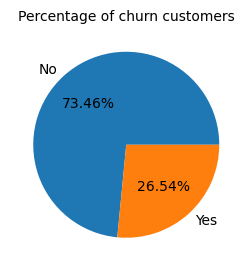

In [56]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churn customers",fontsize=10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers are churned out.Now let's explore the reason

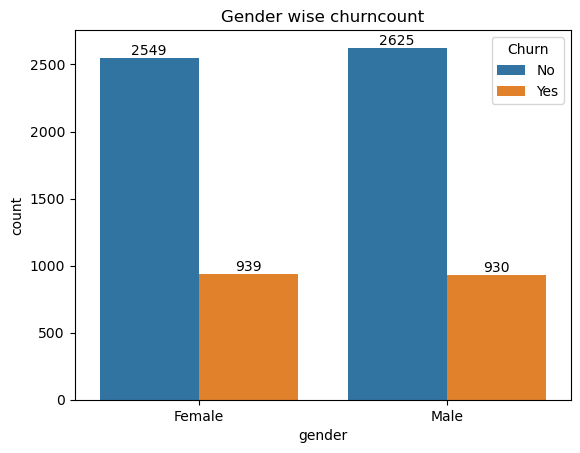

In [57]:
ax=sns.countplot(x="Gender",hue="Churn",data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender wise churncount")
plt.xlabel("gender")
plt.ylabel("count")
plt.show()


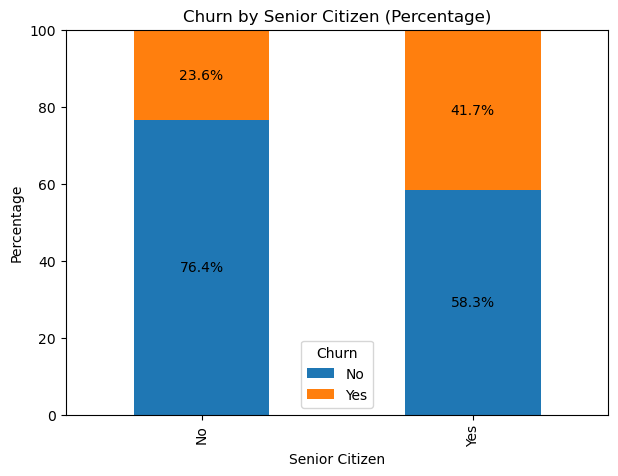

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create crosstab
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to percentage
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(7,5)
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',
        label_type='center'
    )

plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.ylim(0, 100)
plt.show()

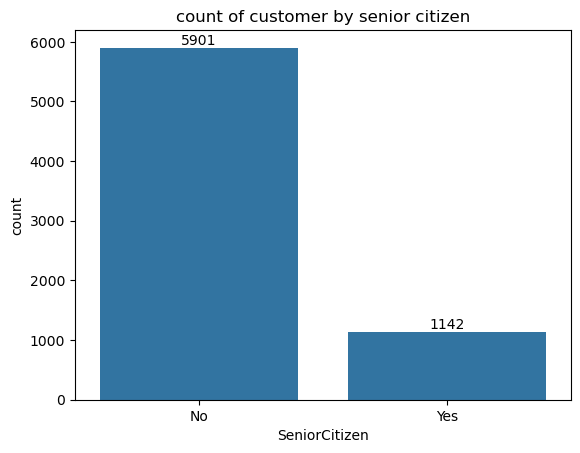

In [59]:
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by senior citizen")
plt.show()


compartive a greater percentage of people in senior citizen catogary have churned

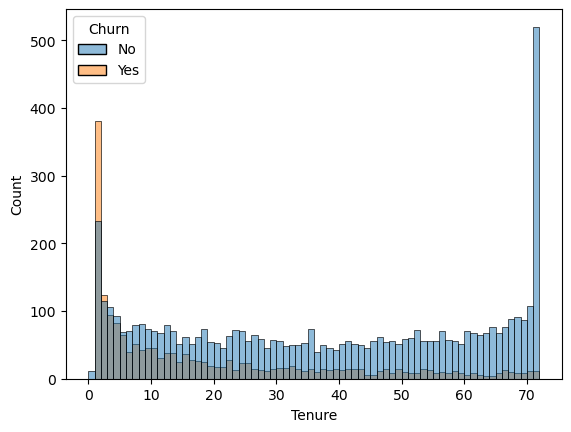

In [60]:
sns.histplot(x="Tenure",data=df,bins=72,hue="Churn")
plt.show()

from these we can conclude that in initial months more people have churned out from their tenure period

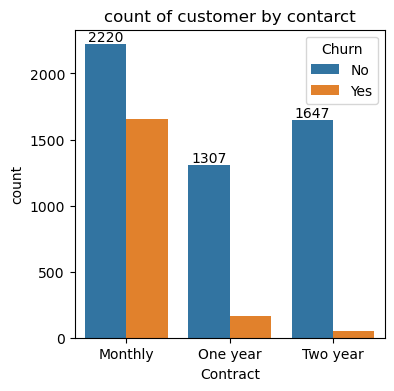

In [65]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",hue="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by contarct")
plt.show()

people who have monthly contract are monthly are likely to be churn out then those who have 1 and 2 year contact

In [68]:
df.columns.values

array(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

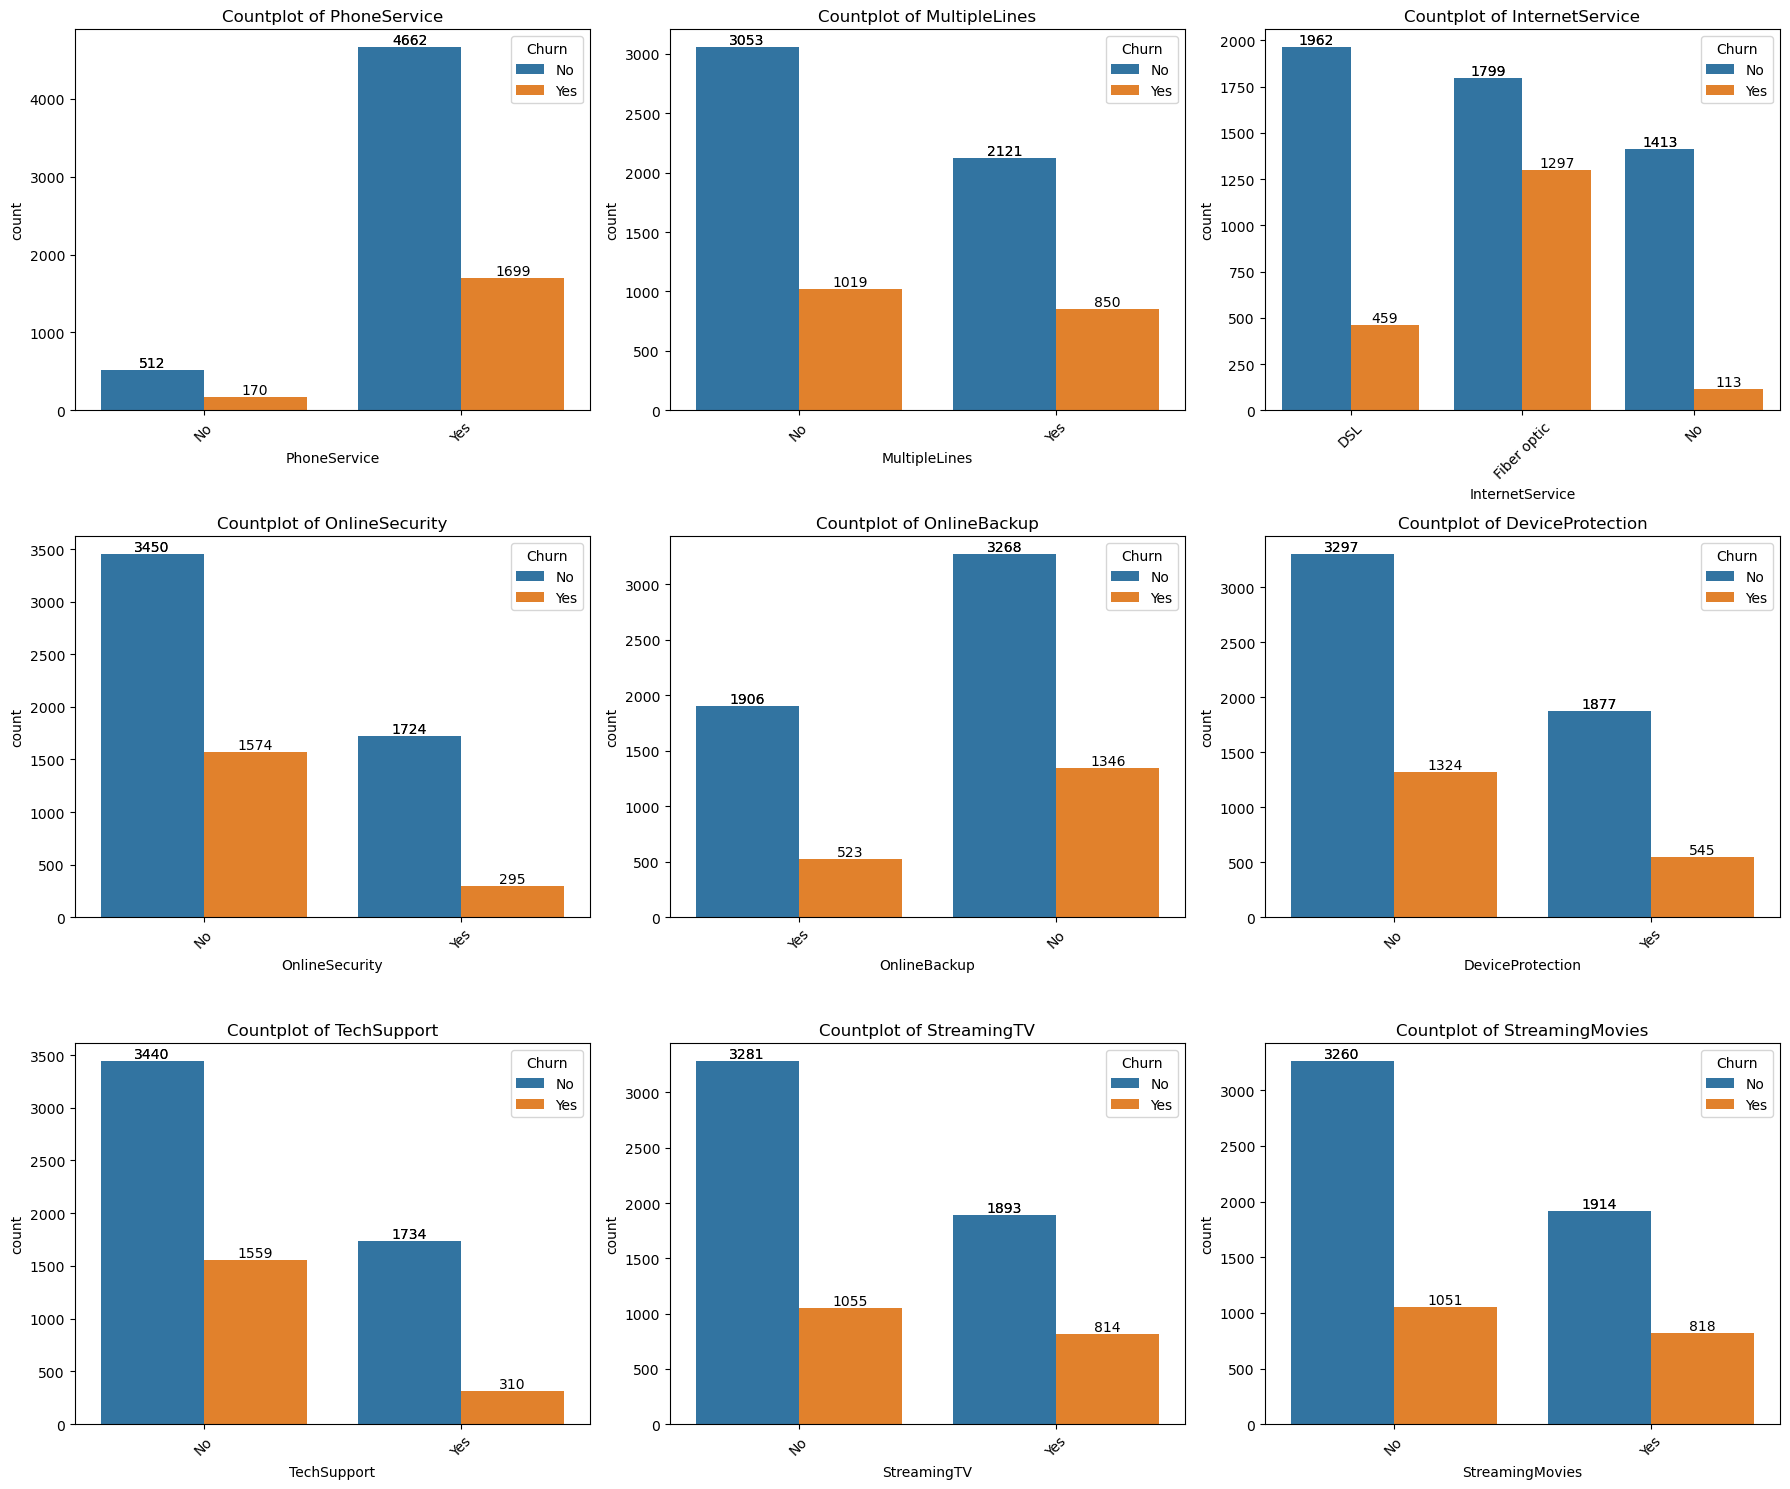

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = [
  'PhoneService',
 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax=sns.countplot(x=col, data=df,hue="Churn")
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    ax.bar_label(ax.containers[0])
    for container in ax.containers:
        ax.bar_label(container)
plt.tight_layout()
plt.show()

teh majority of customers who do not churn tend to have services like phone servious,internet services(particulary DSL),and online security  enalbled for services like online backups,tech support and streaming tv churn

In [ ]:
plt.figure(figsize=(2,2))
ax=sns.countplot(x="paymentmethod",data=df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("churned customer by payment methods")
plt.xtick
